# Feedback
## Exercise 1
0.5/0.5

## Exercise 2
1. (infer target attribute type) ok. 0.5/0.5
2. (target attribute plotted distinctly) falta en mayor parte 0.3/1
3. (numeric plots) ok, lo que falta es la distribución condicional. Además muestran el target atribute en la parte ordinaria (tiene que ser destacada). La fila `num_cols, cat_cols =get_column_types(boston_df)` tiene que ser `num_cols, cat_cols =get_column_types(df)` y tiene que ir dentro de la función `univariate_analysis`  0.4/1
4. (categorical plots) ok, pero aquí también faltan los condicionales 0.6/1

## Exercise 3
1. (numerical pair plots) no está bien hecho. `scatter_num_attributes` mira cada pareja 2 veces e incluso combina cada atributo con si mismo. Además no colora adecuadamente 0.3/1
2. (correlation matrix) no grafica nada 0.2/1
3. (categorical pairplots) bien 1/1

## Exercise 4
1. (comparing boxplot with remark) bien. 1/1
2. (PCA) bien 1/1

## Exercise 5
Cómo es la interpretación de la PCA en cuánto a separabilidad de la clases? 0.75/1

Total: 0.5 + 0.5 + 0.3 + 0.4 + 0.6 + 0.3 + 0.2 + 1 + 1 + 1 + 0.75 = 6.55/10

# Universidad de La Sabana 

**Felix Mohr**

## Facultad de Ingenería 2022.2
Supervised Machine Learning


- Gerson Barrera
- Santiago Merchán
- Rodrigo Carranza

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from numpy import percentile
from itertools import combinations
import itertools

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.decomposition import PCA

## Supervised Machine Learning

# Exercise 1. (Column Analysis) 

Write a function **get_column_types(df)** that returns a pair A, B. A should contain the names of attributes in the dataframe df that are numeric attributes.B should contain the names of the categorical attributes of df.This function will be re-used in the next exercises.

In [2]:
def get_column_types(df):
  A = df.select_dtypes(include='number').columns
  print("Numeric attributes: ", A)
  B = df.select_dtypes(exclude='number').columns
  #B = df.select_dtypes(['category']).columns
  print("Categorical attributes: ", B)
  return A, B

In [4]:
boston_df=pd.concat([pd.read_csv('../../../../boston.csv'),(pd.read_csv('../../../../boston_discretized.csv',names=['rad_cat', 'tax_cat', 'ptratio_cat', 'lstat_cat','medv_cat'],header=0))],axis=1).drop("medv_cat",axis=1)
print(boston_df.describe())
print(boston_df.describe(include="object"))

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [24]:
df_iris = pd.read_csv("../../../../iris.csv")

In [5]:
num_cols, cat_cols =get_column_types(boston_df)

Numeric attributes:  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
Categorical attributes:  Index(['rad_cat', 'tax_cat', 'ptratio_cat', 'lstat_cat'], dtype='object')


In [6]:
boston_df[num_cols]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Exercise 2. (Univariate Analysis) 

Write a function ***univariate_analysis(df, label***) that receives a pandas data frame df, and the name of a label column label.

The function should now do the following (it is even advisable to write a single function for each of the following points and only call those functions from univariate_analysis(df,label)):

1. infer, based on the column type of the label, whether this is a regression or classificationproblem. 
2. create a figure that gives an overview of the target attribute (type of depending on whether it is numeric or categorical). 
3. for the numeric attributes, create plots that summarizeP(Xj)for every attributeXjin isolation. This must cover general insights into the distribution as well as outliers(histograms/boxplots).
**For classification problems, you might visualizeP(Xj|y)right away instead. For regres-sion problems, add a regression plot instead that relates the numerical attribute withthe numerical target.**
4. for the categorical attributes, create plots that showP(Xj)for each attributeXj.

Hint: It can be useful to write some small helper functions to create specific plots that are needed repeatedly

In [7]:
def interactive_boxplots(df, numerical_attributes):
  print("Executing ... Boxplots Analysis")
  num_df = df[numerical_attributes]
  fig = px.box(num_df.melt(), y="value", facet_col="variable",facet_col_wrap=5, boxmode="overlay", color="variable",height=500, width=700)
  fig.update_yaxes(matches=None)

  for i in range(len(fig["data"])):
      yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
      fig.layout[yaxis_name].showticklabels = True

  fig.update_layout(showlegend=False)
  fig.update_xaxes(showline=True, linewidth=2, linecolor='grey')
  fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')

  fig.show()

#interactive_boxplots(boston_df, num_cols)

In [8]:
def histplot(df, num_attributes):
  print("Executing ... Histograms Analysis")
  num_df = df[num_attributes]
  df_melt = pd.melt(num_df, value_vars =num_df)
  fig = sns.FacetGrid(df_melt, col='variable', col_wrap=5, sharex=False, sharey = False)
  fig = fig.map(sns.histplot, 'value')
  fig

#histplot(boston_df, num_cols)

In [9]:
def freq_plots_cat(df, cat_attributes):
  print("Executing ... Frequency Analysis for Categoical Attributes")
  fig=plt.figure(figsize=(20,10))
  fig.subplots_adjust(wspace=0.4,hspace=0.4)
  for i,col in enumerate(cat_attributes):
      ax=fig.add_subplot(2,4,i+1)
      sns.countplot(df[col])
  plt.show()

#freq_plots_cat(boston_df, cat_cols)

This is a Classification Problem Dataset

 El atributo species Contiene 0 valores nulos del total de 150 

 
 Basic Statistics for: species 
 count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object 

 Value Counts Results for: species 
 setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64 

Numeric attributes:  Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Categorical attributes:  Index(['species'], dtype='object')
Executing ... Histograms Analysis
Executing ... Boxplots Analysis


Executing ... Frequency Analysis for Categoical Attributes


/home/felix/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



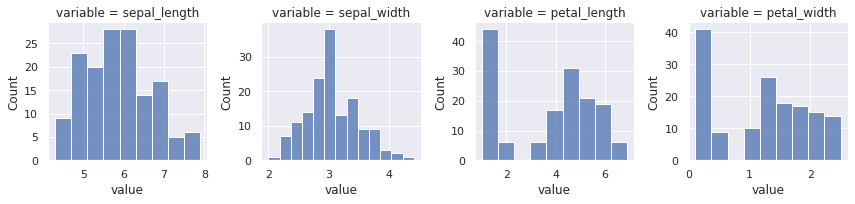

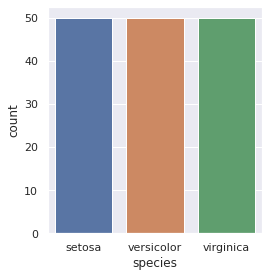

In [26]:
def get_ml_problem(df, label):

  if (df[label].dtype == 'category' or df[label].dtype == 'boolean' )  or (df[label].nunique == 2):
    print("This is a  Binary Classification Problem Dataset")
    out = "Classification"
  elif (df[label].dtype == 'category') or (len(df[label].value_counts()) <= 5):
    print("This is a Classification Problem Dataset")
    out = "Classification"
  else: 
    print("This is a Regression Problem Dataset")
    out = "Regression"
  return out
 
def get_basic_overview(df, label):

  return print("\n" ,"El atributo", label, "Contiene" ,df[label].isnull().sum(), "valores nulos del total de" ,len(df),"\n\n",
              "\n" , "Basic Statistics for:", label, "\n" ,df[label].describe(include = "object"), "\n\n",
               "Value Counts Results for:", label,"\n" , df[label].value_counts(), "\n" )


def univariate_analysis(df, label):

  get_ml_problem(df, label )

  get_basic_overview(df, label )
    
  num_cols, cat_cols =get_column_types(df)

  histplot(df, num_cols)
  
  interactive_boxplots(df, num_cols)

  freq_plots_cat(df, cat_cols)

univariate_analysis(df_iris, "species")

  # Exercise 3 (Bivariate Analysis) 
  
  Write a function ***bivariate_analysis(df, label)***, which  does the following: 
  1. For each pair of numerical attributes, create exactly one scatter plot (look at the iter-tools.combinations function to create the set of all such pairs).  Do not use seaborn pairplots, because these create too many figures. Use the target variable to color the points in the plot (different colors in classification and different intensities in regression). 
  2. Create a heatmap showing the correlation matrix of the numerical attributes (can includethe target variable if numeric). Make sure that you use a diverging color map in whicha value of 0 is shown as white. 
  3. For all combinations of categorical non-target attributesXj, Xk, find a way to visualizethe (empirical) joint distributionP(Xj, Xk).

In [11]:
#sns.pairplot(boston_df[num_cols])
#sns.pairplot(boston_df[num_cols],hue=label)

In [12]:
def scatter_num_attributes(df, num_cols): 

  for x_col in num_cols:
    for y_col in num_cols:
      figure = plt.figure
      ax = plt.gca()
      ax.scatter(df[x_col], df[y_col])
      ax.set_xlabel(x_col)
      ax.set_ylabel(y_col)
      ax.set_title("{} vs {}".format(x_col, y_col))

      plt.legend()
      plt.show()

In [13]:
def corr_matriz(df, num_cols):
  corr = df[num_cols].corr()
  corr.style.background_gradient(cmap='coolwarm').set_precision(3)


In [14]:
target="species"
if target in cat_cols: 
  cat_cols.tolist().remove(target)
  print(cat_cols)

In [15]:
def cat_joint(df, target, cat_attributes):

  if target in cat_attributes: cat_attributes.tolist().remove(target)
  length = len(cat_attributes)
  if length == 0: return

  cat_df = df[cat_attributes]
  combinations = itertools.combinations(cat_df, 2)
  length_combinations = sum(1 for i in combinations)
  pl_ro=int(length_combinations/2)
  fig, axs = plt.subplots(pl_ro, 2, figsize=(15, 40))

  i = 0
  j = 0

  for p1, p2 in itertools.combinations(cat_df, 2):
    sns.histplot(cat_df, x=p1, y=p2, stat='probability', ax=axs[i][j], cbar=True, legend= True)
    if j == 1:
      i = i + 1
      j = 0
    else:
      j = j + 1

  fig.tight_layout()


#cat_joint(boston_df, "medv" , cat_cols )

/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



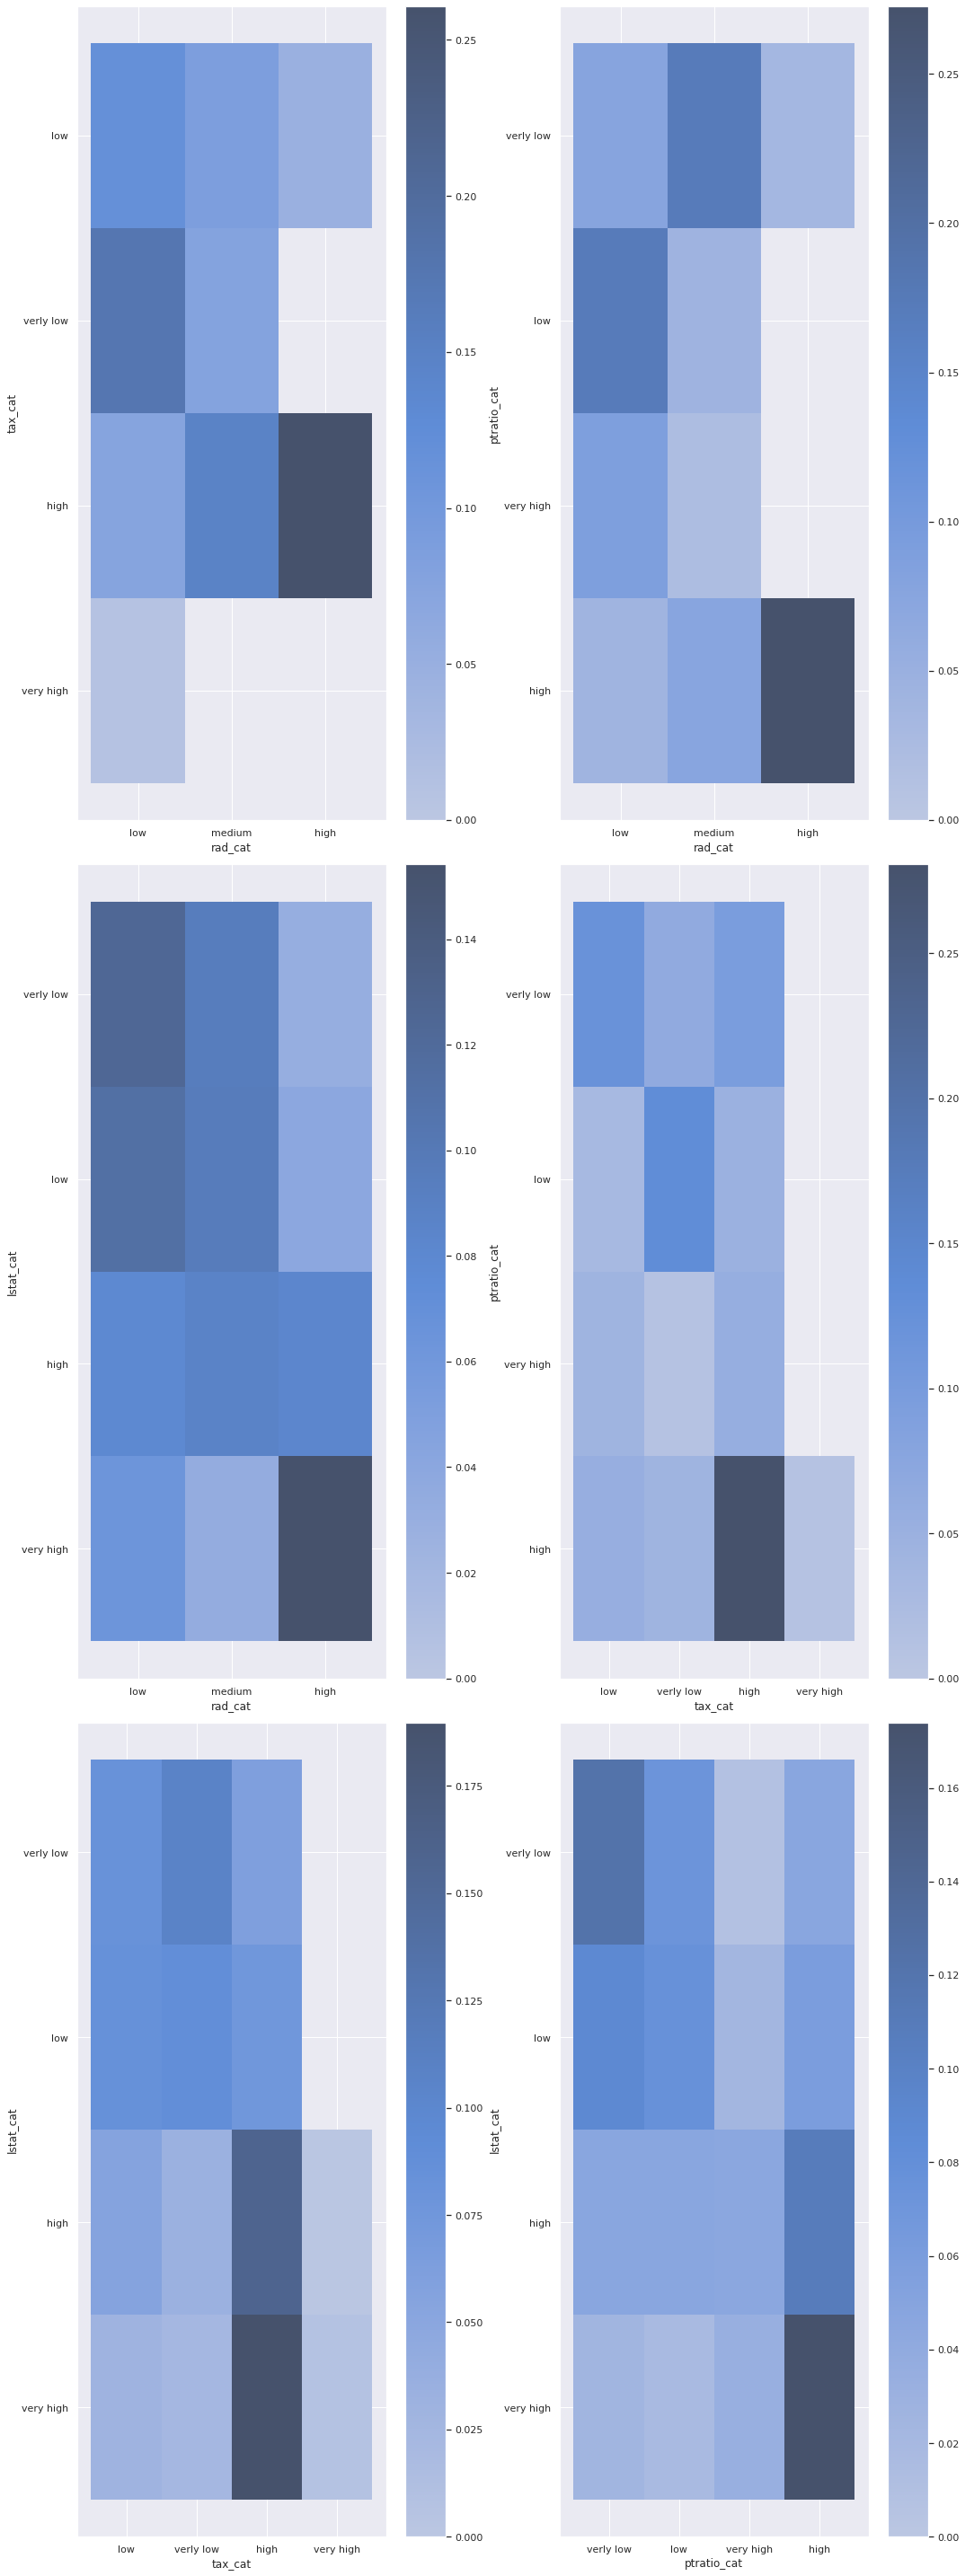

In [33]:
def  bivariate_analysis(df, label):
  #scatter_num_attributes(df, num_cols)
  corr_matriz(df, num_cols)
  cat_joint(df, label , cat_cols )
  return

bivariate_analysis(boston_df, "medv")

# Exercise 4 (Multivariate Analysis) 

Write a function ***multivariate_analysis(df, label***),which does the following:
1. Create a joint boxplot of all numeric attributes. Also give an automatically generated text message that assert whether normalization is necessary or not (your criterion)
2. Conduct a 2D and 3D PCA and visualize the data in the reduced dimensions. Report the portion of variance preserved in each case (hint: the PCA in scikit-learn can do all of this

In [17]:
def must_normalize(df, num_attributes):
  desv_list=[]
  normalizar=""
  for i in num_attributes:
    q25= percentile(df[i], 25)
    q75=percentile(df[i], 75)
    cut_off=(q75-q25#IQR
             )*1.5
    lower, upper = round(q25 - cut_off,1), round(q75 + cut_off,1)
    desv=round(df[(df[i]>=lower)|(df[i]<=upper)][i].std(),1)
    desv_list.append(desv)
  if max(desv_list)/sum(desv_list)>(sum(desv_list)/len(desv_list))/sum(desv_list)*1.2:
    print("Se considera necesario Normalizar")
    normalizar="Si"
  else: print("No se considera necesario Normalizar")
  normalizar="No"
  return normalizar
#must_normalize(boston_df, num_cols)

In [18]:
def joint_boxplot(df, num_attributes):
  fig, ax = plt.subplots()
  sns.set(rc={'figure.figsize':(24,16)})
  sns.boxplot(data=df[num_attributes], orient="h")


# joint_boxplot(boston_df, num_cols)

Se considera necesario Normalizar


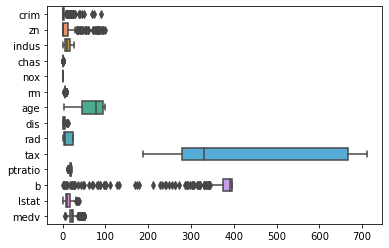

In [19]:
def multivariate_analysis(df, label):

  joint_boxplot(df, label)
  normalizar=must_normalize(df, label)
  return normalizar
normalizar=multivariate_analysis(boston_df, num_cols)

In [20]:
def dimensionality_reduction(components,label,df):
    #while True:
    #    components = int(input("Enter number of components (2 or 3):-"))
    #    if components < 2:
    #        continue
    #    elif components >3:
    #        continue
    #    else:
    #        break
    #label = str(input("Enter your label:-"))
    #df = str(input("Enter your dataset name:-"))
    if normalizar=="Si":
        df1=StandardScaler().fit_transform(df[num_cols])
        pca = PCA(n_components=components)
        principalComponents = pca.fit_transform(df1)
    else: 
        pca = PCA(n_components=components)
        principalComponents = pca.fit_transform(df[num_cols])
    if components==2:
        finalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
        finalDf = pd.concat([finalDf, df[[label]]], axis = 1)
        print(f"el primer componente principal explica el ratio de varianza en: {round(pca.explained_variance_ratio_[0],2)*100}% y el segundo : {round(pca.explained_variance_ratio_[1],4)*100}%")      
    elif components==3: 
        finalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
        finalDf = pd.concat([finalDf, df[[label]]], axis = 1)
        print(f"el primer componente principal explica el ratio de varianza en: {round(pca.explained_variance_ratio_[0],2)*100}% y el segundo : {round(pca.explained_variance_ratio_[1],4)*100}% y el tercero : {round(pca.explained_variance_ratio_[2],4)*100}%")
        total_var = pca.explained_variance_ratio_.sum() * 100

        fig = px.scatter_3d(
            principalComponents, x=0, y=1, z=2, color=df[label],
            title=f'Total Explained Variance: {total_var:.2f}%',
            labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
        )
        fig.show()
    fig = px.scatter(principalComponents, x=0, y=1, color=finalDf[label])
    fig.show()

In [21]:
#2 Componentes
dimensionality_reduction(2,"rad_cat",boston_df)

el primer componente principal explica el ratio de varianza en: 80.0% y el segundo : 16.27%


In [22]:
#3 Componentes
dimensionality_reduction(3,"rad_cat",boston_df)

el primer componente principal explica el ratio de varianza en: 80.0% y el segundo : 16.27% y el tercero : 2.1399999999999997%


# Exercise 5. (Complete Analysis)
1. Run a complete analysis on the iris and boston dataset (in the standard and discretized versions).
2. Run a complete analysis on your own dataset.
3. Give an interpreting summary of the EDA for your own data. This should be between half a page and one page (PDF!).

# Iris Dataset

In [36]:
iris_df =pd.concat([pd.read_csv('../../../../iris.csv'),(pd.read_csv('../../../../iris_discretized.csv',names=['sepal_length_cat', 'sepal_width_cat', 'petal_length_cat', 'petal_width_cat','species_cat'],header=0))],axis=1).drop("species_cat",axis=1)
print(iris_df.describe())
print(iris_df.describe(include="object"))
num_cols, cat_cols =get_column_types(iris_df)
iris_df

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
       species sepal_length_cat sepal_width_cat petal_length_cat  \
count      150              150             150              150   
unique       3                4               4                3   
top     setosa            Short           Short           Medium   
freq        50               50              84               54   

       petal_width_cat  
count              150  
unique               4  
top                Big  
freq               

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_cat,sepal_width_cat,petal_length_cat,petal_width_cat
0,5.1,3.5,1.4,0.2,setosa,Very Short,Long,Small,Very Small
1,4.9,3.0,1.4,0.2,setosa,Very Short,Short,Small,Very Small
2,4.7,3.2,1.3,0.2,setosa,Very Short,Short,Small,Very Small
3,4.6,3.1,1.5,0.2,setosa,Very Short,Short,Small,Very Small
4,5.0,3.6,1.4,0.2,setosa,Very Short,Long,Small,Very Small
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,Long,Short,Big,Very Big
146,6.3,2.5,5.0,1.9,virginica,Long,Very Short,Big,Big
147,6.5,3.0,5.2,2.0,virginica,Long,Short,Big,Very Big
148,6.2,3.4,5.4,2.3,virginica,Long,Long,Big,Very Big


This is a Classification Problem Dataset

 El atributo species Contiene 0 valores nulos del total de 150 

 
 Basic Statistics for: species 
 count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object 

 Value Counts Results for: species 
 setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64 

Numeric attributes:  Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Categorical attributes:  Index(['species', 'sepal_length_cat', 'sepal_width_cat', 'petal_length_cat',
       'petal_width_cat'],
      dtype='object')
Executing ... Histograms Analysis
Executing ... Boxplots Analysis


Executing ... Frequency Analysis for Categoical Attributes


/home/felix/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/felix/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/felix/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/felix/anaconda3/lib/python3.7/site-packages/seabo

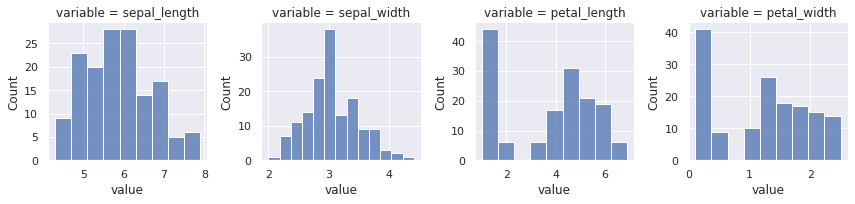

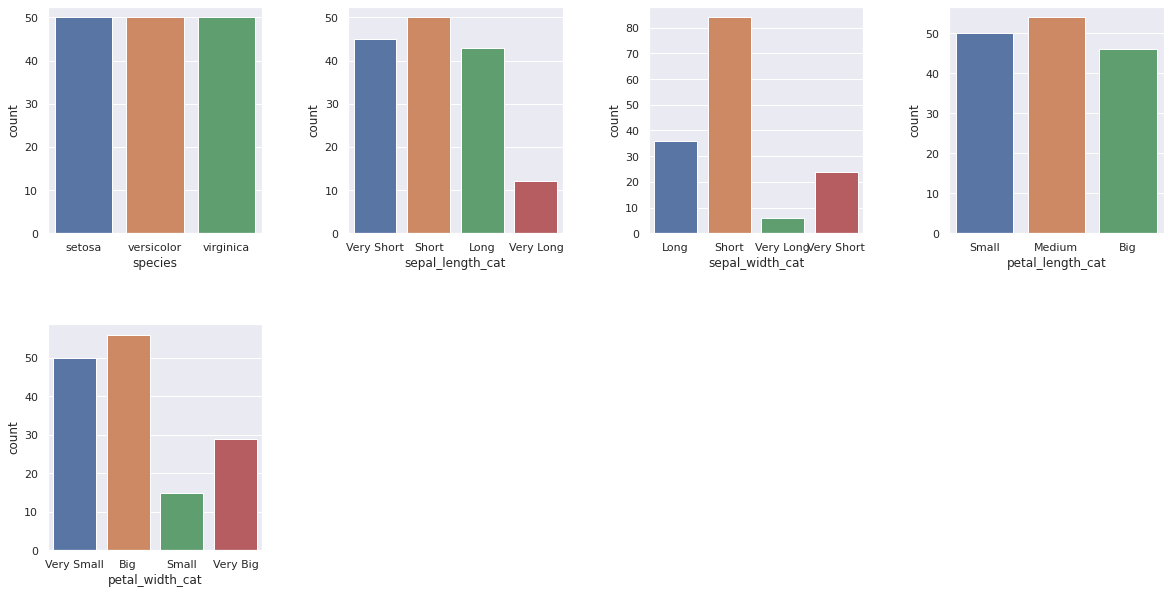

In [37]:
univariate_analysis(iris_df,'species')

/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



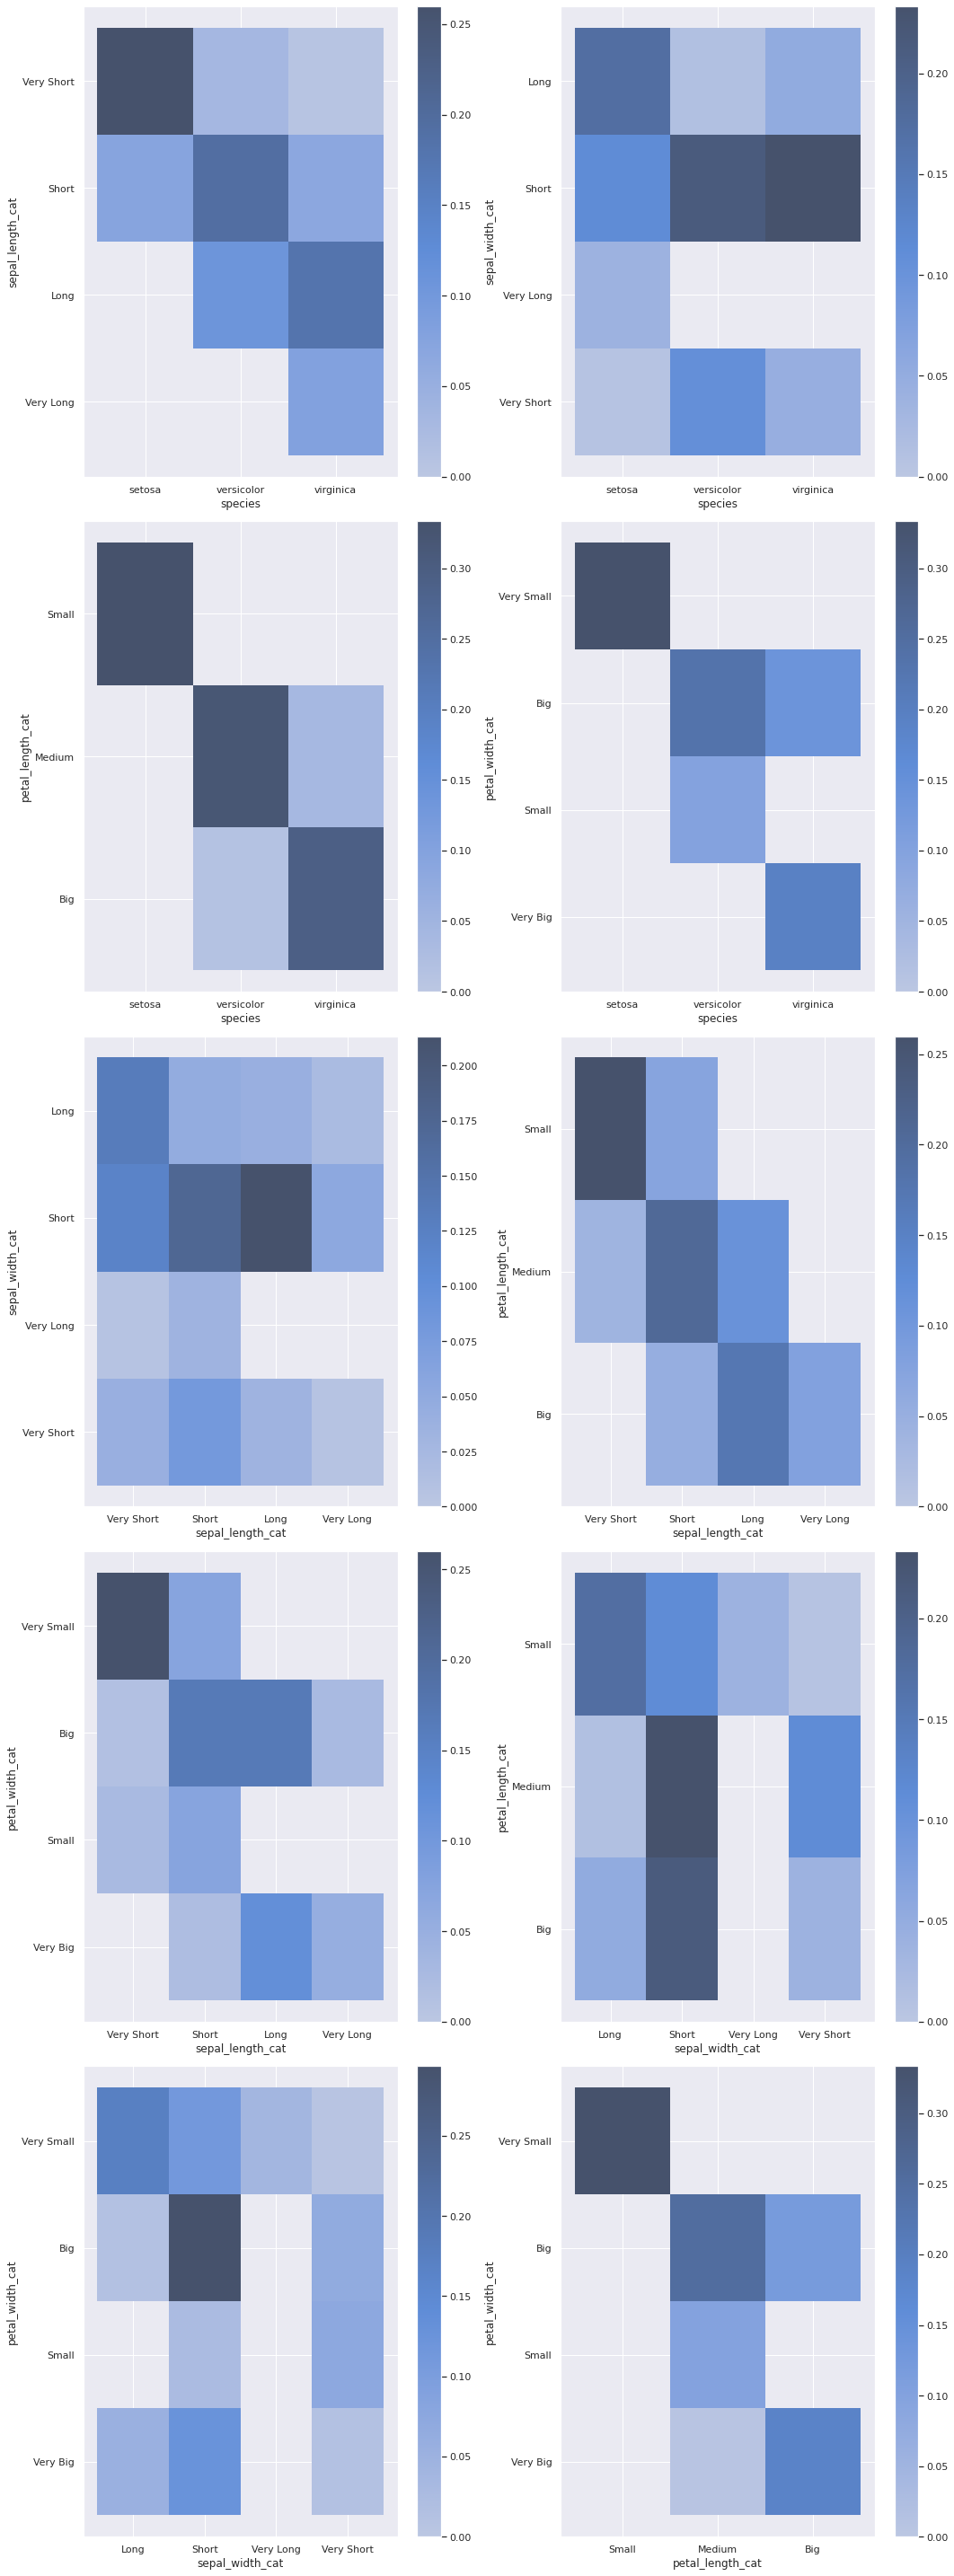

In [38]:
bivariate_analysis(iris_df,"species")

Se considera necesario Normalizar


'No'

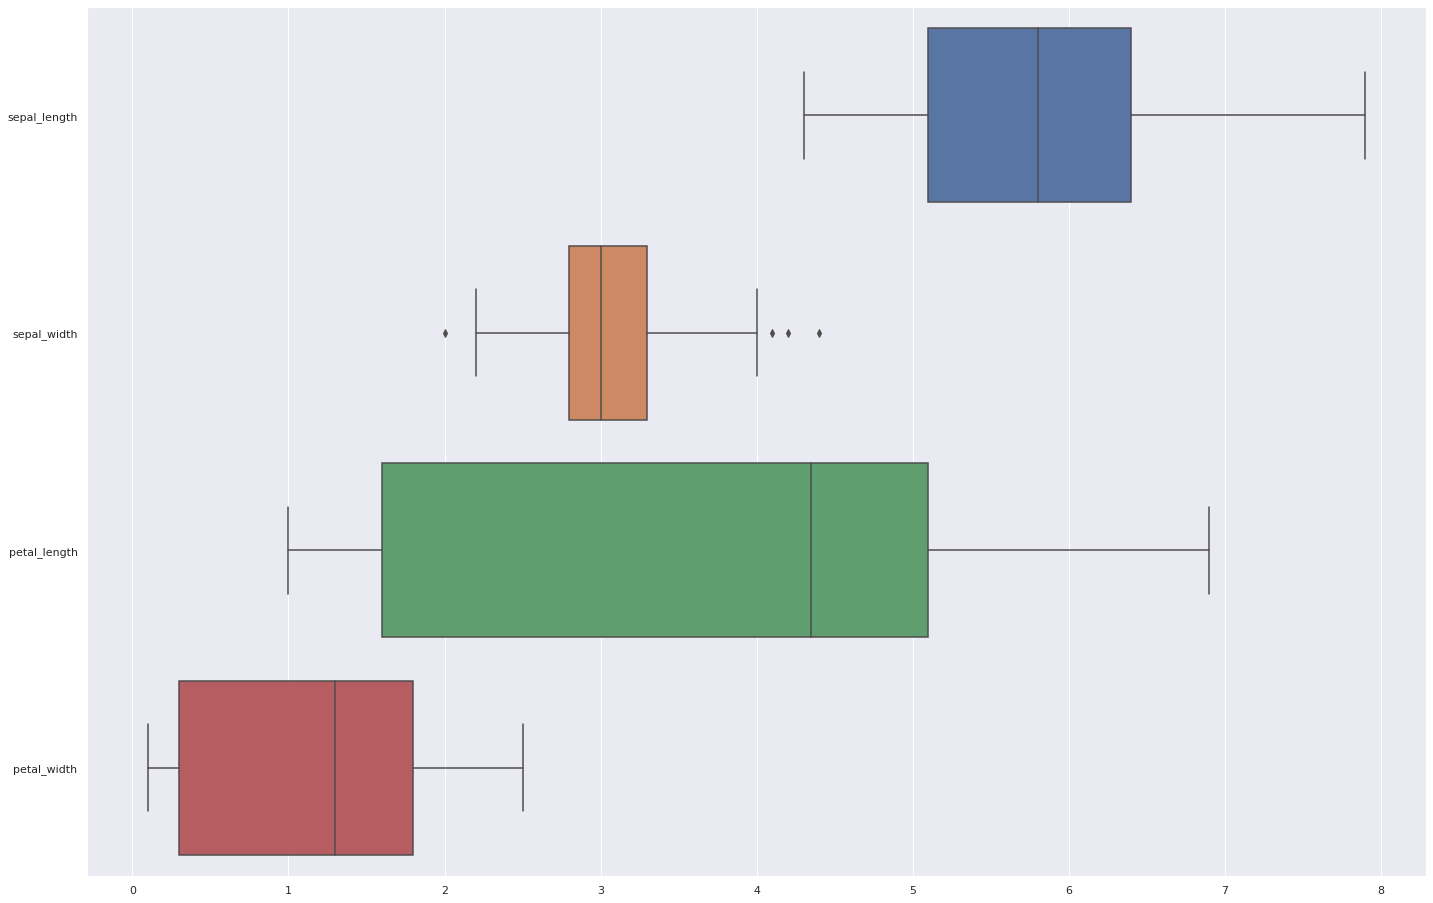

In [39]:
multivariate_analysis(iris_df,num_cols)

In [40]:
#2 Componentes
dimensionality_reduction(2,"species",iris_df)

el primer componente principal explica el ratio de varianza en: 92.0% y el segundo : 5.3%


In [41]:
#3 Componentes
dimensionality_reduction(3,"species",iris_df)

el primer componente principal explica el ratio de varianza en: 92.0% y el segundo : 5.3% y el tercero : 1.72%


# Breast Cancer

In [42]:
cancer_df = pd.read_csv('/content/Breast_Cancer.csv')
print(cancer_df.describe())
print(cancer_df.describe(include="object"))
cancer_df=cancer_df.drop(['Marital Status', '6th Stage','differentiate'],axis=1)
num_cols, cat_cols =get_column_types(cancer_df)

FileNotFoundError: [Errno 2] No such file or directory: '/content/Breast_Cancer.csv'

In [ ]:
univariate_analysis(cancer_df,'Status')

In [ ]:
bivariate_analysis(cancer_df,"Status")

In [ ]:
multivariate_analysis(cancer_df,num_cols)

In [ ]:
#2 Componentes
dimensionality_reduction(2,"Status",cancer_df)

In [43]:
#3 Componentes
dimensionality_reduction(3,"Status",cancer_df)

NameError: name 'cancer_df' is not defined